In [1]:
import numpy as np
import matplotlib.pyplot as plt

This code can perform N body simulation

In [2]:
dt = 0.01
t_init = 0
t_finl = 10
t_steps = int((t_finl-t_init)/dt)+1
time = np.linspace(t_init,t_finl,t_steps)

In [3]:
time[-1]

10.0

In [4]:
G_const = 40
## Sun
M_0      = 1
q0_init  = [0,0,0]
v0_init  = [0,0,0]
## Earth
M_1      = 1e-6
x1_init       = 1
y1_init  = 0
z1_init  = 0
q1_init  = [x1_init,y1_init,z1_init]
vx1_init = 0
vy1_init = 6.28
vz1_init = 0
v1_init  = [vx1_init,vy1_init,vz1_init]
## Jupiter
M_2     = 1e-3
x2_init       = 5.4
y2_init  = 0
z2_init  = 0
q2_init  = [x2_init,y2_init,z2_init]
vx2_init = 0
vy2_init = 2.75
vz2_init = 0
v2_init  = [vx2_init,vy2_init,vz2_init]
## Saturn
M_3      = 1e-3
x3_init       = 9.73
y3_init  = 0
z3_init  = 0
q3_init  = [x3_init,y3_init,z3_init]
vx3_init = 0
vy3_init = 2.03
vz3_init = 0
v3_init  = [vx3_init,vy3_init,vz3_init]
mass     = np.array([M_0,M_1,M_2,M_3])
q_init   = np.vstack((q0_init,q1_init,q2_init,q3_init))
v_init   = np.vstack((v0_init,v1_init,v2_init,v3_init))

In [5]:
print(np.shape(mass))

(4,)


In [6]:
def N_body_gravity_force_calculator(q,mass,G): #q is [N,dim]
    N = len(q[:,0])
    force = np.zeros((3 ,N))
    for i in range(N):
        for j in range(N):
            if j !=i:
                force[:, i] = force[:, i]-G * mass[i] * mass[j] * (q[i,:] - q[j,:]) / np.linalg.norm(q[i,:] - q[j,:])**3
    return force



In [7]:
def N_body_gravity_leap_frog_integrator(time,q_init,v_init,mass,G_const):
    q_T      = np.repeat(q_init[np.newaxis,:,: ],np.size(time),axis=0)   #[time, N,dim]
    v_T      = np.repeat(v_init[np.newaxis,:,: ],np.size(time),axis=0)   #[time, N,dim]
    f_out    = N_body_gravity_force_calculator(q_T[0],mass,G_const)
    a_T      = (np.reciprocal(mass)*f_out).T
    v_T[0]  = v_T[0]+dt/2*np.asarray(a_T)
    for i in range(t_steps-1):
        q_T[i+1] = q_T[i]+dt*v_T[i]
        f_out = N_body_gravity_force_calculator(q_T[i+1],mass,G_const)
        a_T      = (np.reciprocal(mass)*f_out).T
        v_T[i+1]  = v_T[i]+dt*np.asarray(a_T)
    return q_T,v_T,a_T

In [8]:
q_T,v_T,a_T = N_body_gravity_leap_frog_integrator(time,q_init,v_init,mass,G_const)

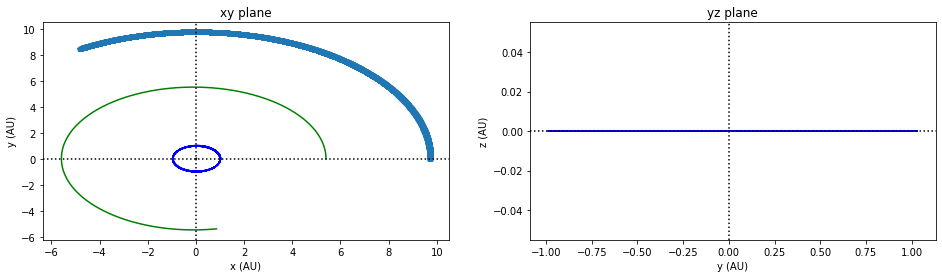

In [9]:
fig, ax =plt.subplots(nrows = 1, ncols = 2, figsize=(16,4))

ax[0].plot(q_T[:,0,0],q_T[:,0,1],'k')
ax[0].plot(q_T[:,1,0],q_T[:,1,1],'b')
ax[0].plot(q_T[:,2,0],q_T[:,2,1],'g')
ax[0].plot(q_T[:,3,0],q_T[:,3,1],'p')
ax[0].set_xlabel('x (AU)')
ax[0].set_ylabel('y (AU)')
ax[0].set_title('xy plane')
ax[0].axhline(y=0.0, color='k', linestyle='dotted')
ax[0].axvline(x=0.0, color='k', linestyle='dotted')
ax[1].plot(q_T[:,0,1],q_T[:,0,2],'k')
ax[1].plot(q_T[:,1,1],q_T[:,1,2],'b')
ax[1].set_xlabel('y (AU)')
ax[1].set_ylabel('z (AU)')
ax[1].set_title('yz plane')
ax[1].axhline(y=0.0, color='k', linestyle='dotted')
ax[1].axvline(x=0.0, color='k', linestyle='dotted')
plt.show()